In [411]:
import numpy as np

import pandas as pd
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 50)
pd.options.mode.chained_assignment = None
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
%matplotlib inline
import seaborn as sns

import os
import pickle
import re

from tqdm import tqdm
from tqdm import tnrange
from tqdm import tqdm_notebook

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from pandas.tools.plotting import autocorrelation_plot
from dateutil.relativedelta import relativedelta
from datetime import datetime as dt
from datetime import timedelta

import json
import plotly.plotly as py
from plotly.graph_objs import *

from fuzzywuzzy import fuzz

In [412]:
with open('hourly_data.pkl', 'rb') as f:
    hourlyData = pickle.load(f)

In [413]:
hourlyData.head(20)

,Count,Duration,Year,Month,Week,Day,Hour,Quarter,DayOfWeek,WorkDay,DayOfYear,Season,Holiday,Weather,TempF,TempC,Humidity,WindSpeed,WindDirection,Pressure,Precip
Time,,,,,,,,,,,,,,,,,,,,,
2015-01-01 00:00:00,4,416.500000,2015,1,1,1,0,1,3,1,1,4,1,1.0,22.0,-5.6,50.0,10.0,220.0,30.07,0.0
2015-01-01 01:00:00,3,768.333333,2015,1,1,1,1,1,3,1,1,4,1,1.0,22.0,-5.6,50.0,10.0,230.0,30.05,0.0
2015-01-01 02:00:00,1,338.000000,2015,1,1,1,2,1,3,1,1,4,1,1.0,22.0,-5.6,50.0,11.0,230.0,30.03,0.0
2015-01-01 03:00:00,0,0.000000,2015,1,1,1,3,1,3,1,1,4,1,1.0,24.0,-4.4,46.0,13.0,240.0,30.01,0.0
2015-01-01 04:00:00,1,429.000000,2015,1,1,1,4,1,3,1,1,4,1,1.0,22.0,-5.6,52.0,15.0,230.0,30.00,0.0
2015-01-01 05:00:00,0,0.000000,2015,1,1,1,5,1,3,1,1,4,1,1.0,23.0,-5.0,48.0,17.0,240.0,30.02,0.0
2015-01-01 06:00:00,0,0.000000,2015,1,1,1,6,1,3,1,1,4,1,1.0,23.0,-5.0,50.0,14.0,240.0,30.02,0.0
2015-01-01 07:00:00,0,0.000000,2015,1,1,1,7,1,3,1,1,4,1,1.0,22.0,-5.6,52.0,13.0,230.0,30.05,0.0
2015-01-01 08:00:00,4,784.000000,2015,1,1,1,8,1,3,1,1,4,1,1.0,25.0,-3.9,44.0,16.0,240.0,30.06,0.0


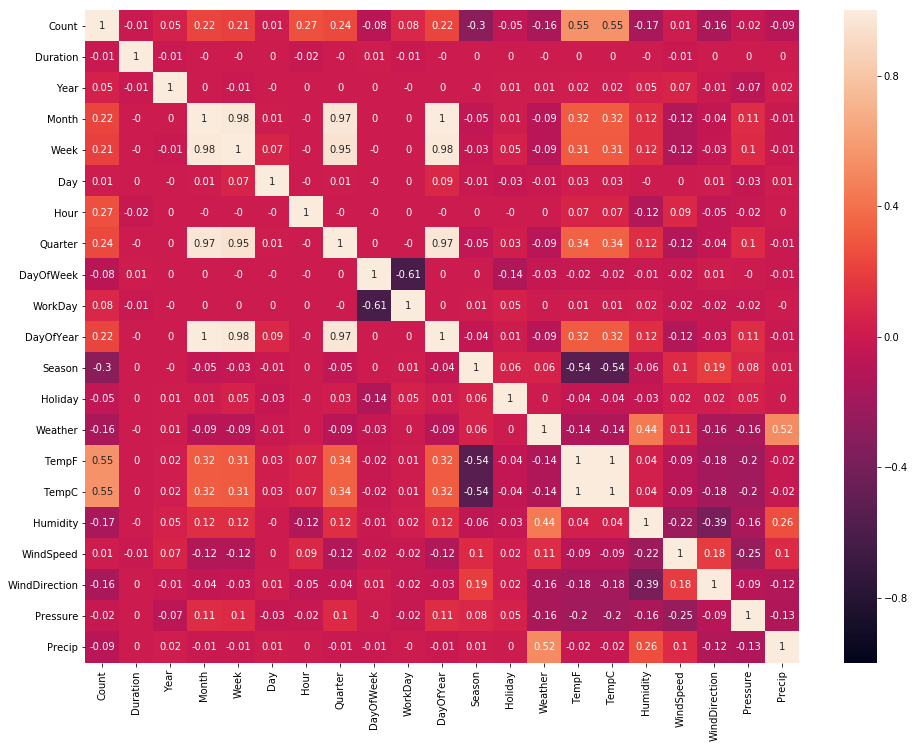

In [414]:
fig, ax = plt.subplots(figsize=(16,12))
sns.heatmap(hourlyData.corr().round(2), ax=ax, annot=True, vmin=-1, vmax=1)

In [415]:
hourlyData = hourlyData.rename(columns={'WorkDay': 'WeekDay'})
hourlyData.head()

,Count,Duration,Year,Month,Week,Day,Hour,Quarter,DayOfWeek,WeekDay,DayOfYear,Season,Holiday,Weather,TempF,TempC,Humidity,WindSpeed,WindDirection,Pressure,Precip
Time,,,,,,,,,,,,,,,,,,,,,
2015-01-01 00:00:00,4,416.500000,2015,1,1,1,0,1,3,1,1,4,1,1.0,22.0,-5.6,50.0,10.0,220.0,30.07,0.0
2015-01-01 01:00:00,3,768.333333,2015,1,1,1,1,1,3,1,1,4,1,1.0,22.0,-5.6,50.0,10.0,230.0,30.05,0.0
2015-01-01 02:00:00,1,338.000000,2015,1,1,1,2,1,3,1,1,4,1,1.0,22.0,-5.6,50.0,11.0,230.0,30.03,0.0
2015-01-01 03:00:00,0,0.000000,2015,1,1,1,3,1,3,1,1,4,1,1.0,24.0,-4.4,46.0,13.0,240.0,30.01,0.0
2015-01-01 04:00:00,1,429.000000,2015,1,1,1,4,1,3,1,1,4,1,1.0,22.0,-5.6,52.0,15.0,230.0,30.00,0.0


In [544]:
# Day of Week vs. Time of Day
weekday_pt = hourlyData.pivot_table(values='Count', aggfunc='mean', index='Hour', columns='WeekDay')
weekday_pt.columns = ['Weekend', 'WeekDay']
weekday_pt = weekday_pt.sort_index(axis=1)
weekday_pt = weekday_pt.append(weekday_pt.iloc[0], ignore_index=True)

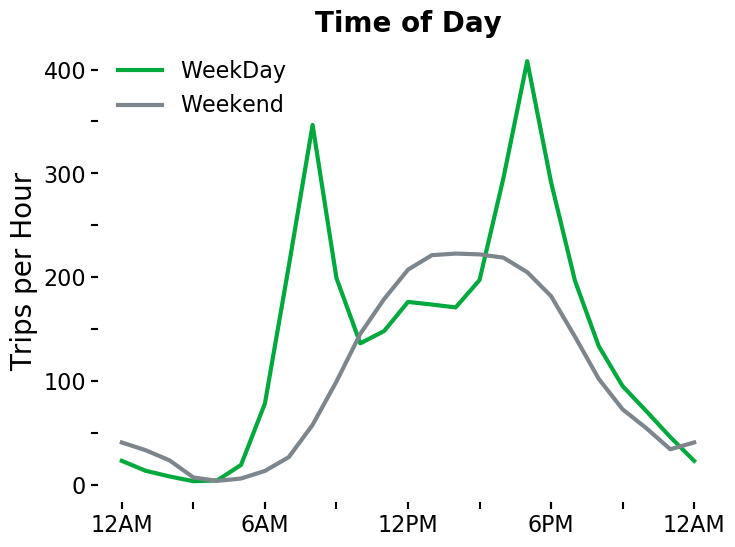

In [647]:
plt.style.use('default')
plt_color = '7d868c'
plt_color = 'white'
fig,ax = plt.subplots(figsize=(8,6), facecolor=plt_color)
weekday_pt.plot(ax=ax, kind='line', lw=3, color=['#00a93d','#7d868c'])

ax.set_title('Time of Day', fontdict={'size': 20, 'weight': 'bold'})

ax.set_ylabel('Trips per Hour', fontdict={'size': 20})
ax.set_yticks(np.arange(0, 401, 50), minor=True)
ax.set_yticks(np.arange(0, 401, 100), minor=False)

ax.set_xticks(np.arange(0,25,3), minor=True)
ax.set_xticks(np.arange(0,25,6), minor=False)
ax.set_xlim(-1, 25)
ax.set_xticklabels(['12AM', '6AM', '12PM', '6PM', '12AM'])

fs = 16
ax.tick_params(which='both', axis='both', labelsize=fs, width=1.5, length=5)
ax.legend(fontsize=fs, frameon=True, facecolor=plt_color, edgecolor=plt_color, loc=2) #, prop={'weight': 'bold'})
ax.set_frame_on(0)    

In [577]:
# Day of Week vs. Demand
dow_pt = hourlyData.pivot_table(values='Count', aggfunc='mean', index='DayOfWeek',)
dow_pt = dow_pt.sort_index(axis=1)

dow_pt = dow_pt.loc[np.roll(dow_pt.index, 1)]
dow = ['Sun', 'Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat']
dow_pt.index = dow

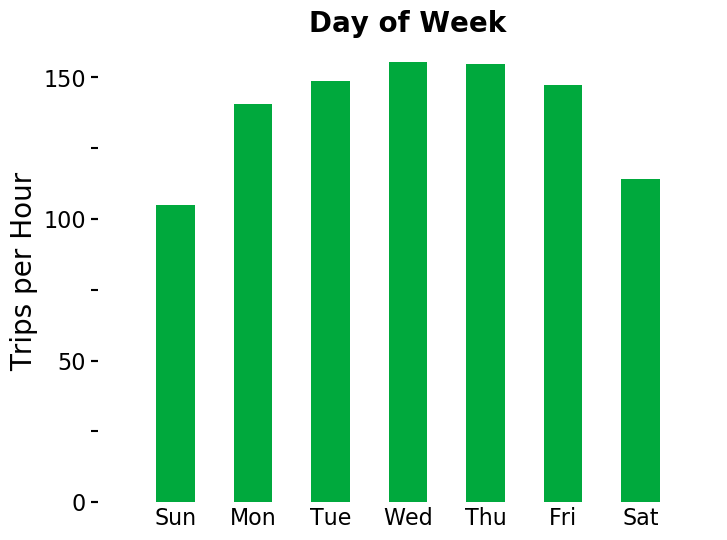

In [644]:
plt.style.use('default')
plt_color = '7d868c'
plt_color = 'white'
fig,ax = plt.subplots(figsize=(8,6), facecolor=plt_color)
dow_pt.plot(ax=ax, kind='bar', color='#00a93d', legend=False)

ax.set_title('Day of Week', fontdict={'size': 20, 'weight': 'bold'})
ax.set_ylabel('Trips per Hour', fontdict={'size': 20})
ax.set_xlabel('')
ax.set_yticks(np.arange(0, 151, 25), minor=True)
ax.set_yticks(np.arange(0, 151, 50), minor=False)
# ax.set_xticks(np.arange(0, 13, 1), minor=False)
ax.set_xlim(-1, 7)
ax.set_frame_on(0)

fs = 16
ax.tick_params(which='both', axis='x', labelsize=fs, width=0, length=0)
ax.tick_params(which='both', axis='y', labelsize=fs, width=1.5, length=5)
ax.set_xticklabels(ax.get_xticklabels(), rotation='horizontal');

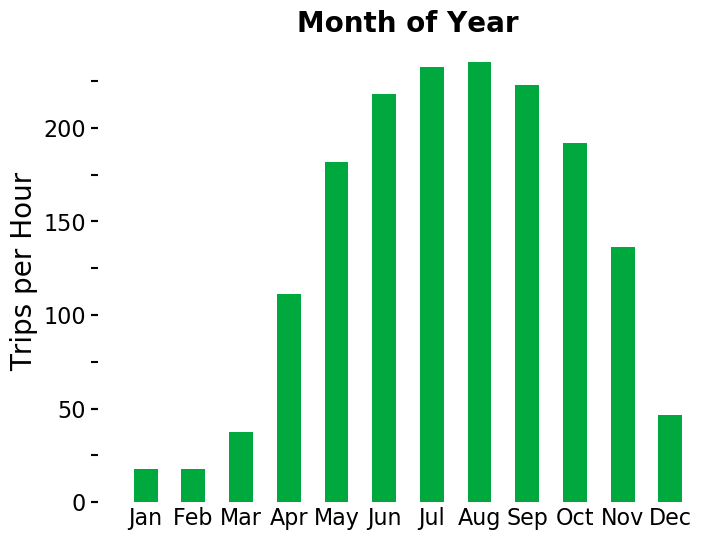

In [646]:
# Month of Year vs. Demand
moy_pt = hourlyData.pivot_table(values='Count', aggfunc='mean', index='Month',)
moy_pt = moy_pt.sort_index(axis=1)

moy = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
moy_pt.index = moy

plt.style.use('default')
plt_color = '7d868c'
plt_color = 'white'
fig,ax = plt.subplots(figsize=(8,6), facecolor=plt_color)
moy_pt.plot(ax=ax, kind='bar', color='#00a93d', legend=False)

ax.set_title('Month of Year', fontdict={'size': 20, 'weight': 'bold'})
ax.set_ylabel('Trips per Hour', fontdict={'size': 20})
ax.set_xlabel('')
ax.set_yticks(np.arange(0, 226, 25), minor=True)
ax.set_yticks(np.arange(0, 226, 50), minor=False)
ax.set_xticks(np.arange(0, 13, 1), minor=False)
ax.set_xlim(-1, 12)
ax.set_frame_on(0)

fs = 16
ax.tick_params(which='both', axis='x', labelsize=fs, width=0, length=0)
ax.tick_params(which='both', axis='y', labelsize=fs, width=1.5, length=5)
# xticklabels = [x[0] for x in moy]
ax.set_xticklabels(ax.get_xticklabels(), rotation='horizontal');

In [633]:
74--10

84

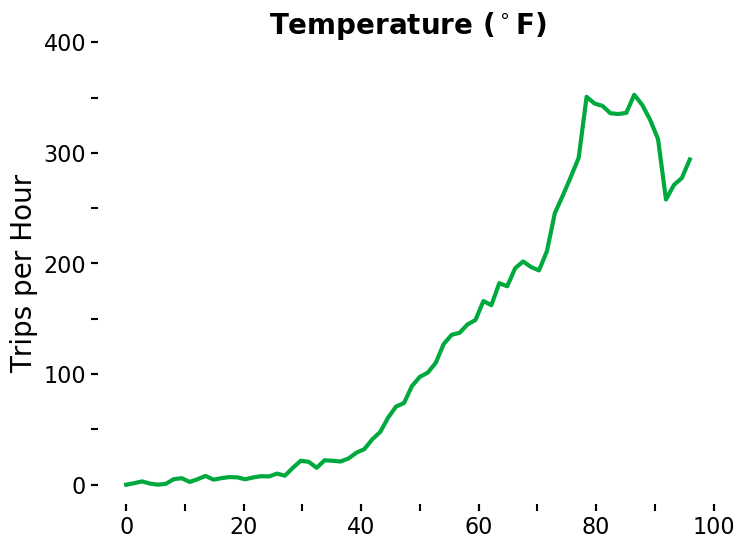

In [650]:
# Temperature vs. Demand (Binned)
cut_pts = np.arange(np.round(hourlyData.TempF.min()-5, -1), np.round(hourlyData.TempF.max()+5, -1)+1, 1.5)
xx = pd.cut(hourlyData.TempF, cut_pts, labels=np.arange(len(cut_pts)-1))
hourlyData['TempBins'] = xx

temp_pt = hourlyData.pivot_table(values='Count', aggfunc='mean', index='TempBins')

plt.style.use('default')
plt_color = '7d868c'
plt_color = 'white'
fig,ax = plt.subplots(figsize=(8,6), facecolor=plt_color)
temp_pt.plot(ax=ax, kind='line', lw=3, color='#00a93d', legend=False)

ax.set_title('Temperature ($^\circ$F)', fontdict={'size': 20, 'weight': 'bold'})

ax.set_ylabel('Trips per Hour', fontdict={'size': 20})
ax.set_yticks(np.arange(0, 401, 50), minor=True)
ax.set_yticks(np.arange(0, 401, 100), minor=False)

# ax.set_xlabel('($^\circ$F)', fontdict={'size': 20})
ax.set_xlabel('')
ax.set_xticks(np.arange(0, 75, 7.4), minor=True)
ax.set_xticks(np.arange(0, 75, 7.4*2), minor=False)
ax.set_xticklabels(np.array(np.arange(cut_pts[0], cut_pts[-1]+1, 10*2)+10, dtype=int))

fs = 16
ax.tick_params(which='both', axis='both', labelsize=fs, width=1.5, length=5)
ax.set_frame_on(0)  

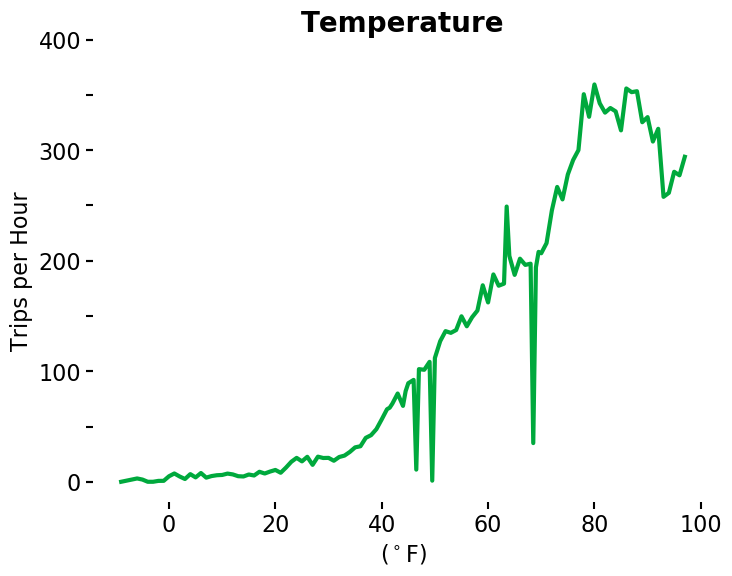

In [632]:
# Temperature vs. Demand (Unbinned)
tempF_pt = hourlyData.pivot_table(values='Count', aggfunc='mean', index='TempF')

plt.style.use('default')
plt_color = '7d868c'
plt_color = 'white'
fig,ax = plt.subplots(figsize=(8,6), facecolor=plt_color)
tempF_pt.plot(ax=ax, kind='line', lw=3, color='#00a93d', legend=False)

ax.set_title('Temperature', fontdict={'size': 20, 'weight': 'bold'})

ax.set_ylabel('Trips per Hour', fontdict={'size': 16})
ax.set_yticks(np.arange(0, 401, 50), minor=True)
ax.set_yticks(np.arange(0, 401, 100), minor=False)

ax.set_xlabel('($^\circ$F)', fontdict={'size': 16})
# ax.set_xticks(np.arange(-10,101,10), minor=True)
# ax.set_xticks(np.arange(0,101,20), minor=False)

fs = 16
ax.tick_params(which='both', axis='both', labelsize=fs, width=1.5, length=5)
ax.set_frame_on(0)    

In [618]:
# Month of Year vs. Demand
hourlyData.Weather = hourlyData.Weather.astype(int)
weather_pt = hourlyData.pivot_table(values='Count', aggfunc='mean', index='Weather')
weather_pt = weather_pt.sort_index(axis=1)
weather_cat = ['Clear', 'Light', 'Moderate', 'Heavy']
weather_pt.index = weather_cat

[Text(0,0,'Clear'), Text(0,0,'Light'), Text(0,0,'Moderate'), Text(0,0,'Heavy')]

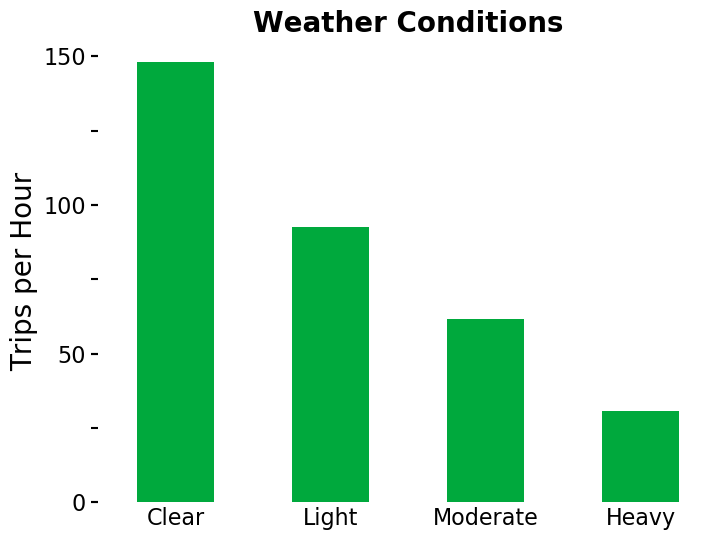

In [648]:
plt.style.use('default')
plt_color = '7d868c'
plt_color = 'white'
fig,ax = plt.subplots(figsize=(8,6), facecolor=plt_color)
weather_pt.plot(ax=ax, kind='bar', color='#00a93d', legend=False)

ax.set_title('Weather Conditions', fontdict={'size': 20, 'weight': 'bold'})
ax.set_ylabel('Trips per Hour', fontdict={'size': 20})
ax.set_xlabel('')
ax.set_yticks(np.arange(0, 151, 25), minor=True)
ax.set_yticks(np.arange(0, 151, 50), minor=False)
# ax.set_xticks(np.arange(0, 13, 1), minor=False)
# ax.set_xlim(-1, 12)
ax.set_frame_on(0)

fs = 16
ax.tick_params(which='both', axis='x', labelsize=fs, width=0, length=0)
ax.tick_params(which='both', axis='y', labelsize=fs, width=1.5, length=5)
ax.set_xticklabels(ax.get_xticklabels(), rotation='horizontal')

In [624]:
# Windspeed vs. Demand
wind_pt = hourlyData.pivot_table(values='Count', aggfunc='mean', index='WindSpeed')
wind_pt = wind_pt.sort_index(axis=1)

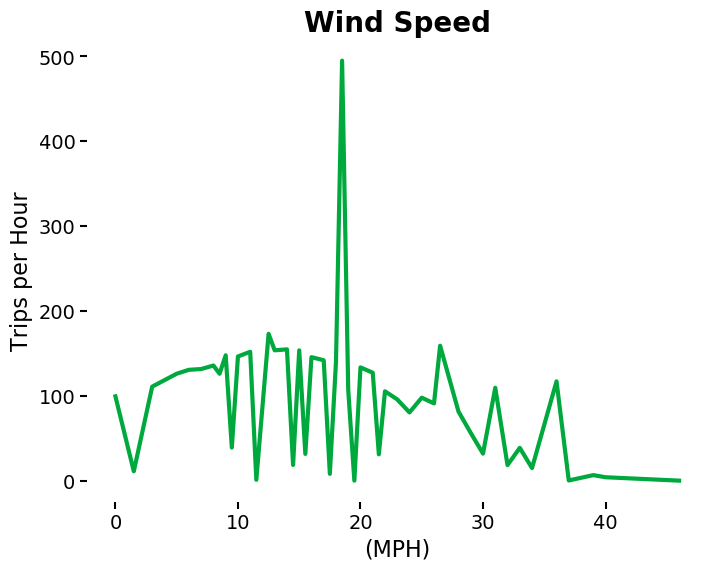

In [625]:
plt.style.use('default')
plt_color = '7d868c'
plt_color = 'white'
fig,ax = plt.subplots(figsize=(8,6), facecolor=plt_color)
wind_pt.plot(ax=ax, kind='line', lw=3, color='#00a93d', legend=False)

ax.set_title('Wind Speed', fontdict={'size': 20, 'weight': 'bold'})

ax.set_ylabel('Trips per Hour', fontdict={'size': 16})
# ax.set_yticks(np.arange(0, 401, 50), minor=True)
# ax.set_yticks(np.arange(0, 401, 100), minor=False)

ax.set_xlabel('(MPH)', fontdict={'size': 16})
# ax.set_xticks(np.arange(-10,101,10), minor=True)
# ax.set_xticks(np.arange(0,101,20), minor=False)

fs = 14
ax.tick_params(which='both', axis='both', labelsize=fs, width=1.5, length=5)
ax.set_frame_on(0)    

### Seasonal Decomposition

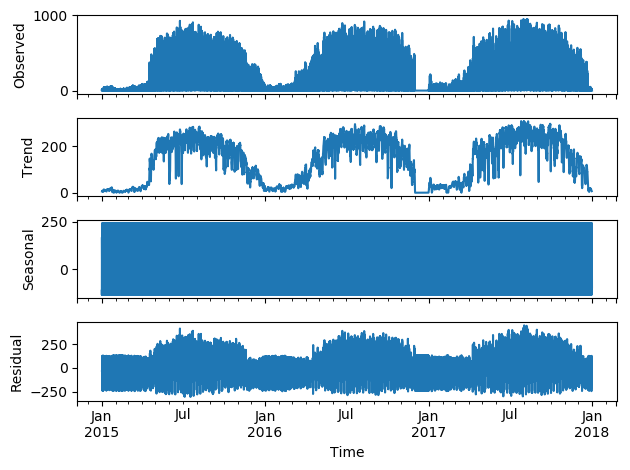

In [663]:
import statsmodels.api as sm
decomposition = sm.tsa.seasonal_decompose(hourlyData.piv, model='additive')
fig = decomposition.plot()

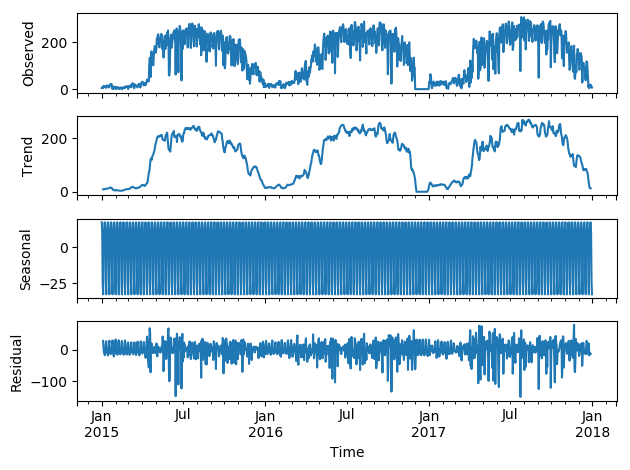

In [682]:
dailyData = hourlyData.Count.resample('D').mean()
decomposition = sm.tsa.seasonal_decompose(dailyData, model='additive')
fig = decomposition.plot()

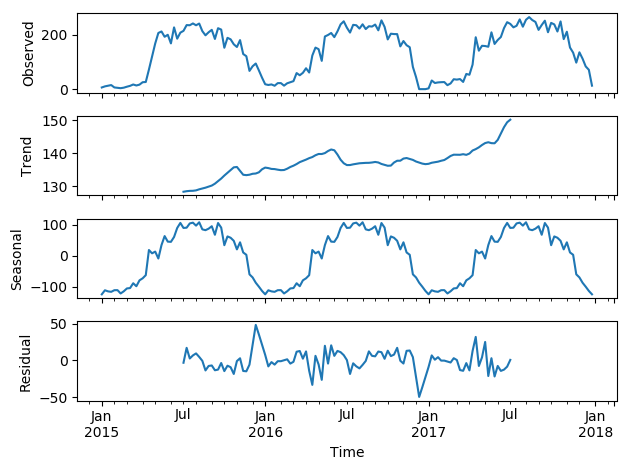

In [684]:
dailyData = hourlyData.Count.resample('W').mean()
decomposition = sm.tsa.seasonal_decompose(dailyData, model='additive')
fig = decomposition.plot()

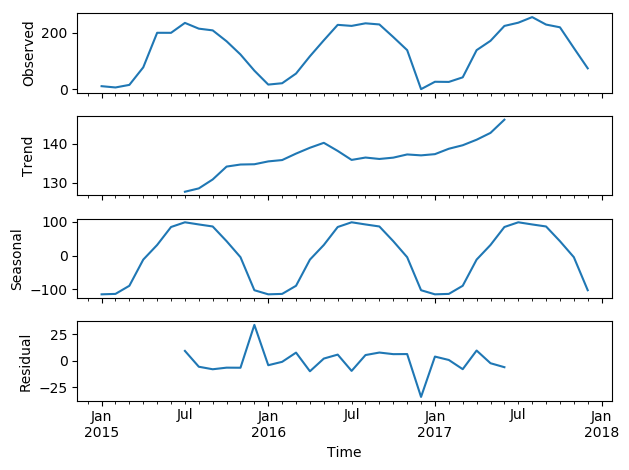

In [685]:
dailyData = hourlyData.Count.resample('M').mean()
decomposition = sm.tsa.seasonal_decompose(dailyData, model='additive')
fig = decomposition.plot()

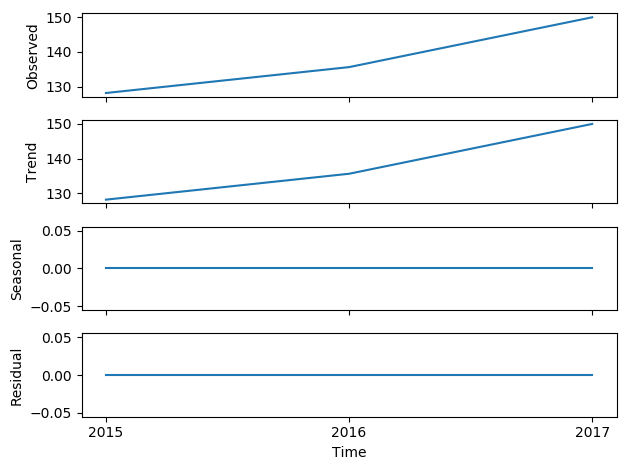

In [686]:
dailyData = hourlyData.Count.resample('Y').mean()
decomposition = sm.tsa.seasonal_decompose(dailyData, model='additive')
fig = decomposition.plot()

### Other EDA

[Text(0,0,'Spring'), Text(0,0,'Summer'), Text(0,0,'Fall'), Text(0,0,'Winter')]

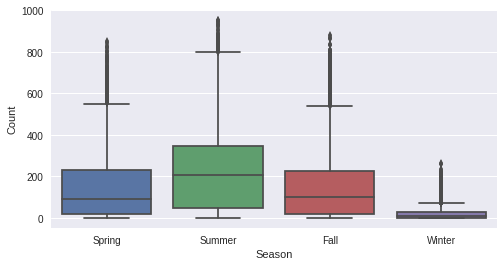

In [15]:
fig, ax = plt.subplots(figsize=(8,4))
sns.boxplot(data=hourlyData,y="Count",x="Season", ax=ax)
ax = plt.gca()
ax.set_xticklabels(['Spring', 'Summer', 'Fall', 'Winter'])

In [210]:
hourlyData

,Count,Duration,Year,Month,Week,Day,Hour,Quarter,DayOfWeek,WeekDay,Holiday,DayOfYear,Season,TempF,TempC,Humidity,WindSpeed,WindDirection,Pressure,Precip
Time,,,,,,,,,,,,,,,,,,,,
2015-01-01 00:00:00,4,416.500000,2015,1,1,1,0,1,3,1,1,1,4,22.0,-5.6,50.0,10.0,220.000000,30.070000,0.000000
2015-01-01 01:00:00,3,768.333333,2015,1,1,1,1,1,3,1,1,1,4,22.0,-5.6,50.0,10.0,230.000000,30.050000,0.000000
2015-01-01 02:00:00,1,338.000000,2015,1,1,1,2,1,3,1,1,1,4,22.0,-5.6,50.0,11.0,230.000000,30.030000,0.000000
2015-01-01 03:00:00,0,0.000000,2015,1,1,1,3,1,3,1,1,1,4,24.0,-4.4,46.0,13.0,240.000000,30.010000,0.000000
2015-01-01 04:00:00,1,429.000000,2015,1,1,1,4,1,3,1,1,1,4,22.0,-5.6,52.0,15.0,230.000000,30.000000,0.000000
2015-01-01 05:00:00,0,0.000000,2015,1,1,1,5,1,3,1,1,1,4,23.0,-5.0,48.0,17.0,240.000000,30.020000,0.000000
2015-01-01 06:00:00,0,0.000000,2015,1,1,1,6,1,3,1,1,1,4,23.0,-5.0,50.0,14.0,240.000000,30.020000,0.000000
2015-01-01 07:00:00,0,0.000000,2015,1,1,1,7,1,3,1,1,1,4,22.0,-5.6,52.0,13.0,230.000000,30.050000,0.000000
2015-01-01 08:00:00,4,784.000000,2015,1,1,1,8,1,3,1,1,1,4,25.0,-3.9,44.0,16.0,240.000000,30.060000,0.000000


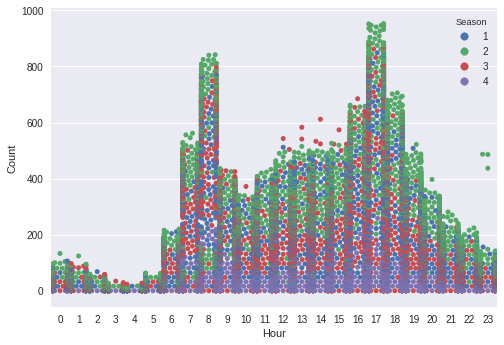

In [16]:
sns.swarmplot(x='Hour',y='Count',data=hourlyData, hue='Season')

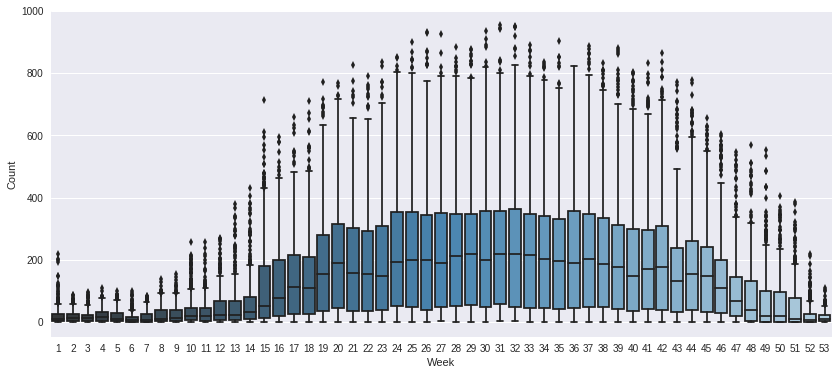

In [17]:
fig, ax = plt.subplots(figsize=(14,6))
sns.boxplot(x='Week', y='Count', data=hourlyData, palette='Blues_d', ax=ax)

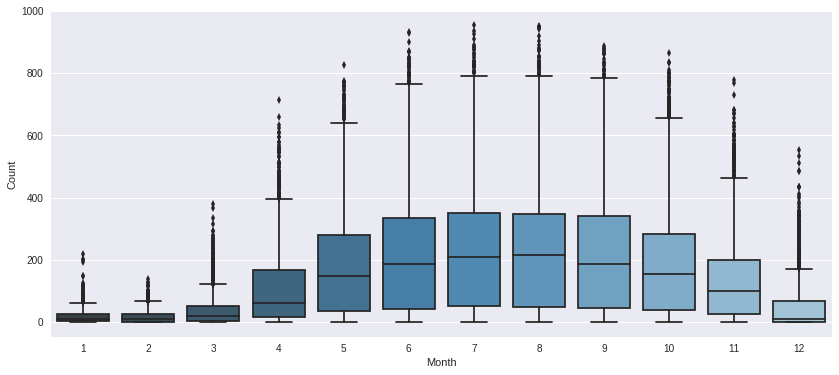

In [18]:
fig, ax = plt.subplots(figsize=(14,6))
sns.boxplot(x='Month', y='Count', data=hourlyData, palette='Blues_d', ax=ax)

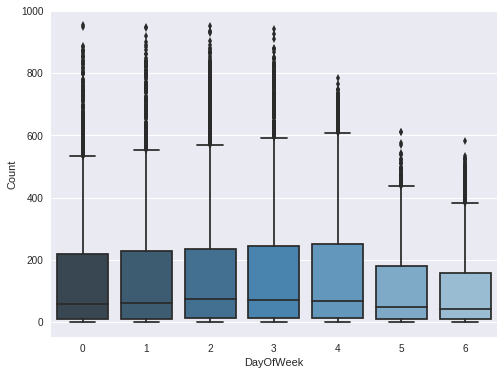

In [19]:
fig, ax = plt.subplots(figsize=(8,6))
sns.boxplot(x='DayOfWeek', y='Count', data=hourlyData, palette='Blues_d', ax=ax)

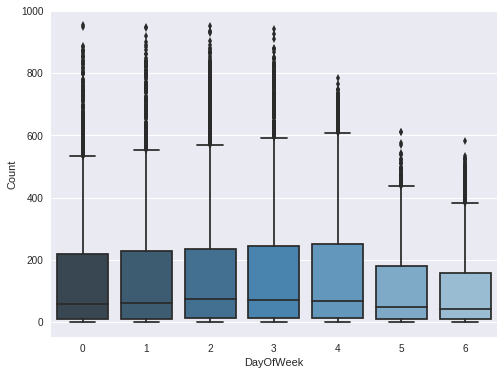

In [20]:
fig, ax = plt.subplots(figsize=(8,6))
sns.boxplot(x='DayOfWeek', y='Count', data=hourlyData, palette='Blues_d', ax=ax)

[Text(0,0.5,'Count'),
 Text(0.5,0,'Working Day'),
 Text(0.5,1,'Box Plot On Count Across Working Day')]

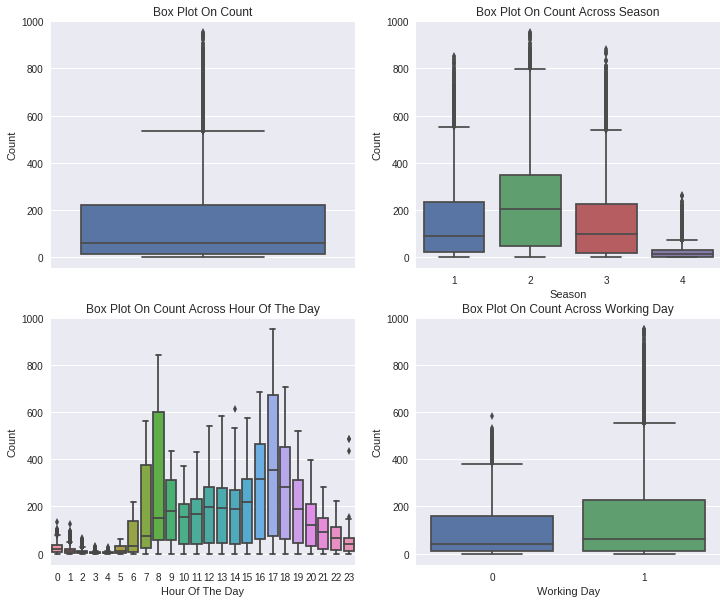

In [22]:
fig, axes = plt.subplots(nrows=2,ncols=2)
fig.set_size_inches(12, 10)
sns.boxplot(data=hourlyData,y="Count",orient="v",ax=axes[0][0])
sns.boxplot(data=hourlyData,y="Count",x="Season",orient="v",ax=axes[0][1])
sns.boxplot(data=hourlyData,y="Count",x="Hour",orient="v",ax=axes[1][0])
sns.boxplot(data=hourlyData,y="Count",x="WorkDay",orient="v",ax=axes[1][1])

axes[0][0].set(ylabel='Count',title="Box Plot On Count")
axes[0][1].set(xlabel='Season', ylabel='Count',title="Box Plot On Count Across Season")
axes[1][0].set(xlabel='Hour Of The Day', ylabel='Count',title="Box Plot On Count Across Hour Of The Day")
axes[1][1].set(xlabel='Working Day', ylabel='Count',title="Box Plot On Count Across Working Day")

In [ ]:
hourlyData.columns

In [ ]:
# corr = hourlyData.corr()
# mask = np.array(corr)
# mask[np.tril_indices_from(mask)] = False
# fig,ax= plt.subplots(figsize=(15,15))
# # fig.set_size_inches(20,10)
# sn.heatmap(corrMatt, mask=mask,vmax=.8, square=True,annot=False)

In [ ]:
fig,(ax1,ax2,ax3) = plt.subplots(ncols=3)
fig.set_size_inches(12, 5)
sn.regplot(x="TempC", y="Count", data=hourlyData,ax=ax1)
sn.regplot(x="WindSpeed", y="Count", data=hourlyData,ax=ax2)
sn.regplot(x="Humidity", y="Count", data=hourlyData,ax=ax3)

In [ ]:
fig,axes = plt.subplots(ncols=2,nrows=2)
fig.set_size_inches(12, 10)
sn.distplot(hourlyData["Count"],ax=axes[0][0])
stats.probplot(hourlyData["Count"], dist='norm', fit=True, plot=axes[0][1])
# sn.distplot(np.log(dailyDataWithoutOutliers["Count"]),ax=axes[1][0])
# stats.probplot(np.log1p(dailyDataWithoutOutliers["Count"]), dist='norm', fit=True, plot=axes[1][1])

### Random Forest Model

In [ ]:
hourlyData.head()

In [ ]:
hourlyData.info()

In [ ]:
import numpy as np 
import pandas as pd 
from sklearn import cross_validation, grid_search, linear_model, metrics, pipeline, preprocessing
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(hourlyData.drop(columns='Count'), hourlyData.Count, 
                                                    test_size=0.33, random_state=129)

In [ ]:
regressor = RandomForestRegressor(random_state=129, max_depth=20)

In [ ]:
regressor.fit(X_train, y_train)

In [ ]:
regressor.predict(X_test).round(0)

In [ ]:
regressor.score(X_test, y_test)

In [ ]:
plt.plot(y_train, regressor.predict(X_train), 'bo', alpha=0.3, ms=2)
plt.plot(y_test, regressor.predict(X_test), 'ro', alpha = 0.3, ms=2)

In [ ]:
regressor.base_estimator_

In [ ]:
sn.regplot(y_test, regressor.predict(X_test))

In [ ]:
sn.jointplot(y_test, regressor.predict(X_test), kind='reg')

In [ ]:
import statsmodels.api as sm

In [ ]:
poisson_mdl = sm.GLM(y_train, X_train, family=sm.families.Poisson())

In [ ]:
poisson_results = poisson_mdl.fit()

In [ ]:
poisson_results.summary()

In [ ]:
a = poisson_results.predict(X_test)

In [ ]:
negbin_mdl = sm.GLM(y_train, X_train, family=sm.families.NegativeBinomial())

In [ ]:
negbin_results = negbin.fit()

In [ ]:
negbin_results.summary()

In [ ]:
b = negbin_results.predict(X_test)
b.plot()

In [ ]:
a.plot()

In [ ]:
y_test - a

In [ ]:
c

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [ ]:
k_means = KMeans(init='k-means++', n_clusters=5)

In [ ]:
k_results = k_means.fit(hourlyData)

In [ ]:
# try out a range of cluster sizes to find the one with the best inertia and silhouette scores
inertias = []
silhouettes = []
n_clusters = np.arange(2, 12, 2)
for n in tnrange(len(n_clusters)):
    kmeans = KMeans(n_clusters=n_clusters[n], init="k-means++", random_state=129)
    kmeans.fit(hourlyData)
    inertias.append(kmeans.inertia_)
    
    # only a sample was used to calculate silhouette score because of memory errors
    labels = kmeans.labels_
    silhouettes.append(silhouette_score(hourlyData, labels, metric='euclidean', sample_size=10000))

In [ ]:
# plot the inertia scores and look for the kink in the curve
fig, ax = plt.subplots(figsize=(6, 4))
ax.plot(n_clusters, inertias, color='coral')
ax.grid(linestyle=':', linewidth=1, alpha=0.5)
ax.set_xlabel('Number of Clusters [K]')
ax.set_ylabel('Inertia');
ax.set_frame_on(0)

# plot the silhouettte scores
fig, ax = plt.subplots(figsize=(6, 4))
ax.plot(n_clusters, silhouettes, color='coral')
ax.grid(linestyle=':', linewidth=1, alpha=0.5)
ax.set_xlabel('Number of Clusters [K]')
ax.set_ylabel('Sihouette Score');
ax.set_frame_on(0)

In [ ]:
import pandas as pd
from bokeh.charts import output_file, Chord
from bokeh.io import show
from bokeh.sampledata.les_mis import data
 
nodes = data['nodes']
links = data['links']
 
nodes_df = pd.DataFrame(nodes)
links_df = pd.DataFrame(links)
 
source_data = links_df.merge(nodes_df, how='left', left_on='source', right_index=True)
source_data = source_data.merge(nodes_df, how='left', left_on='target', right_index=True)
source_data = source_data[source_data["value"] > 5]
source_data
 
chord_from_df = Chord(source_data, source="name_x", target="name_y", value="value")
output_file('chord-diagram-bokeh.html', mode="inline")
show(chord_from_df)


In [ ]:
import bokeh

In [ ]:
bokeh.__version__